# Use linear regression to predict the mileage at the end of lease term
I leased a eGolf for 30 month, the lease start from Augest 5th, 2017 and end after 30 monthes, at Feb 5th, 2020.
I got mileage reports in some monthes. Need to predict at the end of lease term, how many mileage I will drive this eGolf.
Exsiting reports I have are:
```
May 5th, 2018, 7813 
April 5th, 2018, 6875
March 5th, 2018, 5689
```
By assume that I drive equally mileage each month, I can use current mileage data to predict the mileage at the end. 

In [27]:
#define the model
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')
a = tf.get_variable(name='a', initializer=tf.constant(0.0))
b = tf.get_variable(name='b', initializer=tf.constant(0.0))
y_predict = a * x + b
loss = tf.losses.mean_squared_error(y, y_predict)
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [29]:
month = [7,8,9]
mileage = [5689.0, 6875.0, 7813.0]
epoches = 1000
losses = []
writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())
loss_summary = tf.summary.scalar("loss", loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epoches):
        _, _loss, _loss_summary = sess.run([opt, loss, loss_summary], feed_dict={x:month, y:mileage})
        losses.append(_loss)
        writer.add_summary(_loss_summary, i)
    _a, _b = sess.run([a,b])
    writer.close() 

In [30]:
print("The linear equation is y={:.5}*x+{:.4}".format(_a, _b))
print("Predicted mileage at the end of lease term (30 monthes) is {}".format(_a*30+_b))

The linear equation is y=879.47*x+-228.5
Predicted mileage at the end of lease term (30 monthes) is 26155.714614868164


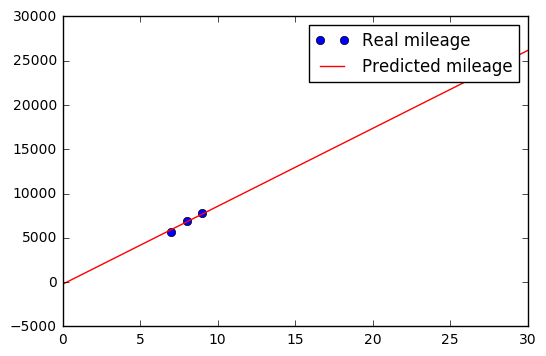

In [31]:
# Draw
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(month, mileage, 'bo', label='Real mileage')
month_range = np.arange(0,31)
plt.plot(month_range, month_range * _a + _b, 'r', label='Predicted mileage')
plt.legend()
plt.show()